In [1]:
import os
import random
import shutil
import os
import tensorflow as tf
import zipfile
from sklearn.model_selection import train_test_split

In [2]:
def split_data1(SOURCE, TRAINING, TESTING, SPLIT_SIZE):


  shuffled_source = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))


  training_number = int(len(shuffled_source) * SPLIT_SIZE)

  i = 0
  target = TRAINING

  for item in shuffled_source:
    item_source = os.path.join(SOURCE, item)
    if os.path.getsize(item_source) == 0:
      print(f'{item} is zero length, so ignoring.')
    else:
      shutil.copyfile(item_source, os.path.join(target, item))
      i += 1


    if i == training_number:
      target = TESTING

In [3]:
training_dir = "/kaggle/input/split-dataset-human-ai-art-detection/split-data/Training"
validation_dir = "/kaggle/input/split-dataset-human-ai-art-detection/split-data/Validation"

train_ai_dir = os.path.join(training_dir, 'AI')
train_human_dir = os.path.join(training_dir, 'Non-AI')

val_human_dir = os.path.join(validation_dir, 'Non-AI')
val_ai_dir = os.path.join(validation_dir, 'AI')

train_ai_awal = os.listdir(train_ai_dir)
train_human_awal = os.listdir(train_human_dir)

val_human_awal = os.listdir(val_human_dir)
val_ai_awal = os.listdir(val_ai_dir)

random.shuffle(train_ai_awal)
random.shuffle(train_human_awal)
random.shuffle(val_human_awal)
random.shuffle(val_ai_awal)

train_ai = train_ai_awal[:20000]
train_human = train_human_awal[:20000]
val_human = val_human_awal[:2200]
val_ai = val_ai_awal[:2200]

print(f"There are {len(train_ai)} images of human art for training")
print(f"There are {len(train_human)} images of AI generated for training")
print(f"There are {len(val_human)} images of human art for validation")
print(f"There are {len(val_ai)} images of AI generated for validation")

There are 20000 images of human art for training
There are 20000 images of AI generated for training
There are 2200 images of human art for validation
There are 2200 images of AI generated for validation


In [4]:
TAI20k = "/kaggle/working/new-split-data/Training/AI"
TNAI20k = "/kaggle/working/new-split-data/Training/Non-AI"
VNAI2k = "/kaggle/working/new-split-data/Validation/Non-AI"
VAI2k = "/kaggle/working/new-split-data/Validation/AI"
os.makedirs(TAI20k, exist_ok=True)
os.makedirs(TNAI20k, exist_ok=True)
os.makedirs(VNAI2k, exist_ok=True)
os.makedirs(VAI2k, exist_ok=True)

In [5]:
test_ai = val_ai_awal[2201:]
test_human = val_human_awal[2201:]
TSTAI = "/kaggle/working/new-split-data/Testing/AI"
TSTNAI = "/kaggle/working/new-split-data/Testing/Non-AI"
os.makedirs(TSTAI, exist_ok=True)
os.makedirs(TSTNAI, exist_ok=True)
print(f"There are {len(test_human)} images of human art for testing")
print(f"There are {len(test_ai)} images of AI generated for testing")

There are 212 images of human art for testing
There are 50 images of AI generated for testing


In [6]:

train_ai_directories = [os.path.join(train_ai_dir, directory) for directory in train_ai]

for source_directory in train_ai_directories:
    destination_path = os.path.join("/kaggle/working/new-split-data/Training/AI", os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)


train_human_directories = [os.path.join(train_human_dir, directory) for directory in train_human]

for source_directory in train_human_directories:
    destination_path = os.path.join("/kaggle/working/new-split-data/Training/Non-AI", os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)


val_human_directories = [os.path.join(val_human_dir, directory) for directory in val_human]

for source_directory in val_human_directories:
    destination_path = os.path.join("/kaggle/working/new-split-data/Validation/Non-AI", os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)

val_ai_directories = [os.path.join(val_ai_dir, directory) for directory in val_ai]

for source_directory in val_ai_directories:
    destination_path = os.path.join("/kaggle/working/new-split-data/Validation/AI", os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)


In [7]:
test_human_directories = [os.path.join(val_human_dir, directory) for directory in test_human]

for source_directory in test_human_directories:
    destination_path = os.path.join(TSTNAI, os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)

test_ai_directories = [os.path.join(val_ai_dir, directory) for directory in test_ai]

for source_directory in test_ai_directories:
    destination_path = os.path.join(TSTAI, os.path.basename(source_directory))
    shutil.copy(source_directory, destination_path)

In [8]:
print(f"There are {len(os.listdir(TAI20k))} images of human art for training")
print(f"There are {len(os.listdir(TNAI20k))} images of AI generated for training")
print(f"There are {len(os.listdir(VNAI2k))} images of human art for validation")
print(f"There are {len(os.listdir(VAI2k))} images of AI generated for validation")
print(f"There are {len(os.listdir(TSTNAI))} images of human art for testing")
print(f"There are {len(os.listdir(TSTAI))} images of AI generated for testing")

There are 20000 images of human art for training
There are 20000 images of AI generated for training
There are 2200 images of human art for validation
There are 2200 images of AI generated for validation
There are 212 images of human art for testing
There are 50 images of AI generated for testing


In [9]:
def create_model():

  model = tf.keras.models.Sequential([

      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dropout(0.5),
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.summary()
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9
)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

  return model



In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        "/kaggle/working/new-split-data/Training",
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        "/kaggle/working/new-split-data/Validation",
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

Found 40000 images belonging to 2 classes.
Found 4400 images belonging to 2 classes.


In [11]:
EPOCHS = 150


model = create_model()


history = model.fit(
      train_generator,
      epochs=EPOCHS,
      validation_data=validation_generator)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416,929 (1.59 MB)

 Trainable params: 416,033 (1.59 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724539867.528345      83 service.cc:145] XLA service 0x7bcfac002d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724539867.528418      83 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724539867.528424      83 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1724539887.927991      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 358ms/step - accuracy: 0.5303 - loss: 0.7189 - val_accuracy: 0.5023 - val_loss: 0.6889
Epoch 2/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 96s 300ms/step - accuracy: 0.6035 - loss: 0.6592 - val_accuracy: 0.6698 - val_loss: 0.6247
Epoch 3/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 296ms/step - accuracy: 0.6363 - loss: 0.6337 - val_accuracy: 0.6907 - val_loss: 0.5924
Epoch 4/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 294ms/step - accuracy: 0.6584 - loss: 0.6169 - val_accuracy: 0.7089 - val_loss: 0.5694
Epoch 5/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 288ms/step - accuracy: 0.6858 - loss: 0.5906 - val_accuracy: 0.7048 - val_loss: 0.5552
Epoch 6/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 292ms/step - accuracy: 0.6999 - loss: 0.5792 - val_accuracy: 0.7191 - val_loss: 0.5422
Epoch 7/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 297ms/step - accuracy: 0.7041 - loss: 0.5701 - val_accuracy: 0.7345 - val_loss: 0.5282
Epoch 8/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 292ms/step - accuracy: 0.7106 - loss: 0.56

In [12]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, linestyle='-', color='red', label='Training accuracy')
  plt.plot(epochs, val_acc, linestyle='-', color='yellow', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, linestyle='-', color='red', label='Training Loss')
  plt.plot(epochs, val_loss, linestyle='-', color='yellow', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

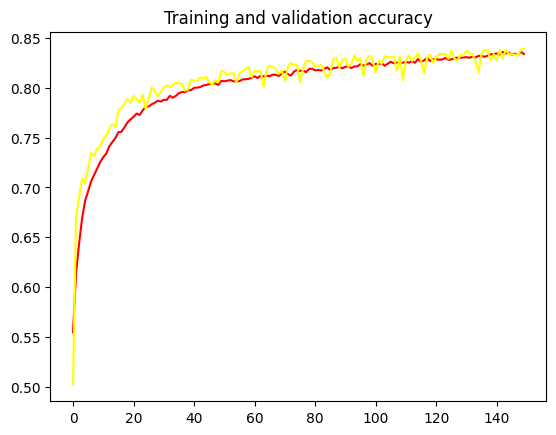

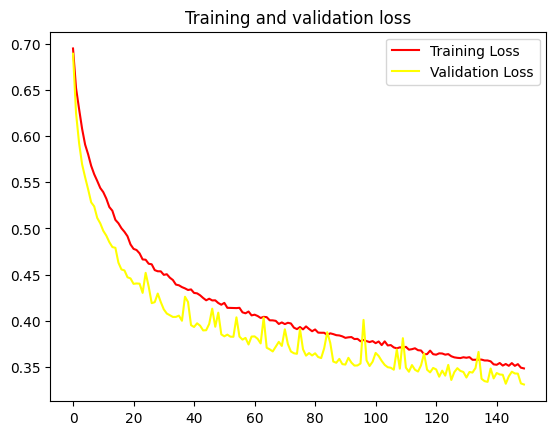

In [13]:
plot_loss_acc(history)

In [14]:
model.save('newmodel.h5')

In [15]:
v_loss, v_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {v_loss}')
print(f'Validation Accuracy: {v_accuracy}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.8424 - loss: 0.3321
Validation Loss: 0.33106499910354614
Validation Accuracy: 0.8395454287528992


In [16]:
import numpy as np
import os
from keras.models import load_model
from keras.preprocessing import image


model = load_model('newmodel.h5')


image_directory = TSTNAI


uploaded_files = os.listdir(image_directory)
A = 0
B = 0
for fn in uploaded_files:

    path = os.path.join(image_directory, fn)


    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)


    images = np.vstack([x])
    classes = model.predict(images, batch_size=64)
    print(classes[0])

    B = B+1
    if classes[0] > 0.5:
        print(fn + " is a human art")
        A=A+1
    else:
        print(fn + " is an AI generated")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step
[1.]
Non-AI-Images--- (7731).jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[0.]
Non-AI-Images--- (13091).jpg is an AI generated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[0.]
Non-AI-Images--- (8437).jpg is an AI generated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[1.]
Non-AI-Images--- (14296).jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[0.]
Non-AI-Images--- (6908).jpg is an AI generated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[1.]
Non-AI-Images--- (12621).jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[0.]
Non-AI-Images--- (4548).jpg is an AI generated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[1.]
Non-AI-Images--- (1345).jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[1.]
795.jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[1.]
6504.jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[1.]
Non-AI-Images--- (14973).jpg is a human art
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[1.]
Non-AI-Images--- (9529).jpg i

In [17]:
print(f"accuracy of the model in the correct predicting is {A/B}")

accuracy of the model in the correct predicting is 0.7641509433962265


In [18]:
import joblib

joblib.dump(model,'newmodel.joblib')

['newmodel.joblib']

In [19]:
import pickle

with open('newmodel.pkl', 'wb') as f:
    pickle.dump(model,f)

In [20]:
from keras.models import load_model


model = load_model('newmodel.h5')


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('newmodel.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))
